In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn import svm
from sklearn.metrics import accuracy_score, RocCurveDisplay
import warnings 
warnings.filterwarnings('ignore')

In [49]:
# load dataset
Ng_Thyroid= pd.read_csv("data/NG_Thy_Data_Clean.csv")

In [51]:
# Head of dataset
#print 15 rows of the dataset
Ng_Thyroid.head(n=15)


,Age,Gender,T3,T4,FT3,FT4,TSH,Outcome
0,53,F,0.93,6.60,0.00,0.00,0.8900,2
1,49,F,3.50,160.90,4.42,7.19,0.1000,1
2,48,F,0.00,0.00,14.40,32.90,0.0046,2
3,40,F,3.00,3004.00,5.09,11.49,0.0075,2
4,43,F,3.20,1.57,0.00,0.00,0.4600,1
5,29,F,0.00,0.00,0.36,0.25,94.3700,2
6,42,F,3.71,11.50,3.13,2.31,0.8900,2
7,30,F,0.00,0.00,8.50,33.90,0.1000,2
8,48,F,0.00,0.00,1.01,0.50,4.9000,1
9,42,F,0.00,0.00,8.30,3.70,0.1400,2


In [52]:
# Clean dataset for use

In [53]:
# load dataset
ThyroidData= pd.read_csv("data/NG_Thy_Data_Clean.csv")

In [54]:
#Print 20 of the clean dataset
ThyroidData.head(n=20)

,Age,Gender,T3,T4,FT3,FT4,TSH,Outcome
0,53,F,0.93,6.60,0.00,0.00,0.8900,2
1,49,F,3.50,160.90,4.42,7.19,0.1000,1
2,48,F,0.00,0.00,14.40,32.90,0.0046,2
3,40,F,3.00,3004.00,5.09,11.49,0.0075,2
4,43,F,3.20,1.57,0.00,0.00,0.4600,1
5,29,F,0.00,0.00,0.36,0.25,94.3700,2
6,42,F,3.71,11.50,3.13,2.31,0.8900,2
7,30,F,0.00,0.00,8.50,33.90,0.1000,2
8,48,F,0.00,0.00,1.01,0.50,4.9000,1
9,42,F,0.00,0.00,8.30,3.70,0.1400,2


In [55]:
# shape of dataset
ThyroidData.shape

(716, 8)

In [56]:
# dataset information

ThyroidData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      716 non-null    int64  
 1   Gender   716 non-null    object 
 2   T3       715 non-null    float64
 3   T4       716 non-null    float64
 4   FT3      716 non-null    float64
 5   FT4      716 non-null    float64
 6   TSH      716 non-null    float64
 7   Outcome  716 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 44.9+ KB


In [57]:
ThyroidData.describe()

,Age,T3,T4,FT3,FT4,TSH,Outcome
count,716.000000,715.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,39.093575,4.614617,149.045399,0.354413,0.546788,4.175941,1.037709
std,14.910677,20.949303,302.519948,2.551463,4.367398,38.378311,0.906836
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.520000,25.945000,0.000000,0.000000,0.100000,0.000000
50%,38.000000,2.510000,112.065000,0.000000,0.000000,0.700000,1.000000
75%,48.250000,4.050000,192.115000,0.000000,0.000000,2.162500,2.000000
max,95.000000,422.360000,3050.000000,38.340000,73.100000,1003.000000,2.000000


In [58]:
#drop duplicate
Data=ThyroidData.drop_duplicates()
Data.shape # if there is no duplicate, same number of rows and columns appears

(714, 8)

In [59]:
#create a list
zero_not_accepted = ['Age','T3','T4','FT3', 'FT4','TSH']
for column in zero_not_accepted:
    Data[column] = Data[column].replace(0,np.NaN)
    mean = int(Data[column].mean(skipna=True))
    Data[column] = Data[column].replace(np.NaN,mean)

In [60]:
Data.head(n=15)

,Age,Gender,T3,T4,FT3,FT4,TSH,Outcome
0,53,F,0.93,6.60,8.00,13.00,0.8900,2
1,49,F,3.50,160.90,4.42,7.19,0.1000,1
2,48,F,4.00,151.00,14.40,32.90,0.0046,2
3,40,F,3.00,3004.00,5.09,11.49,0.0075,2
4,43,F,3.20,1.57,8.00,13.00,0.4600,1
5,29,F,4.00,151.00,0.36,0.25,94.3700,2
6,42,F,3.71,11.50,3.13,2.31,0.8900,2
7,30,F,4.00,151.00,8.50,33.90,0.1000,2
8,48,F,4.00,151.00,1.01,0.50,4.9000,1
9,42,F,4.00,151.00,8.30,3.70,0.1400,2


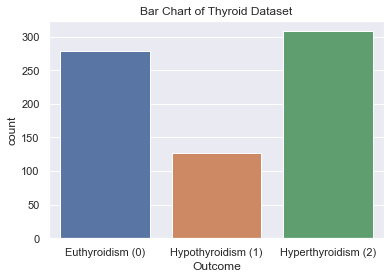

In [63]:
g = sns.countplot(Data['Outcome'])
tick_locations = [0, 1, 2]  # Specify the tick locations
tick_labels = ['Euthyroidism (0)', 'Hypothyroidism (1)', 'Hyperthyroidism (2)']  # Specify the tick labels
g.set_xticks(tick_locations)  # Set the tick locations
g.set_xticklabels(tick_labels)  # Set the tick labels
g.set_title('Bar Chart of Thyroid Dataset')
plt.show()

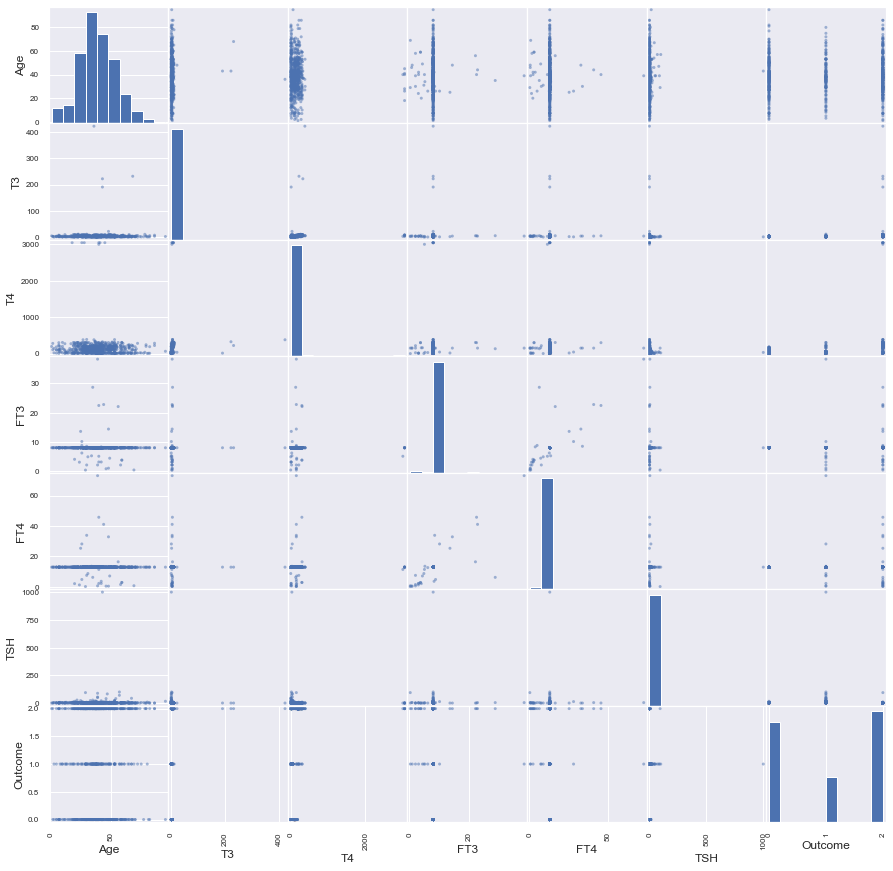

In [64]:
#scatterplot is a type of graph which plots the values of two varies along two areas,
#like age and height, scatterplots are useful for many reasons like 
# correlation matrices, its allows quick understanding and relationship between two variables
#like confusion matrix method
from pandas.plotting import scatter_matrix
scatter_matrix(Data,figsize=(15,15)); 


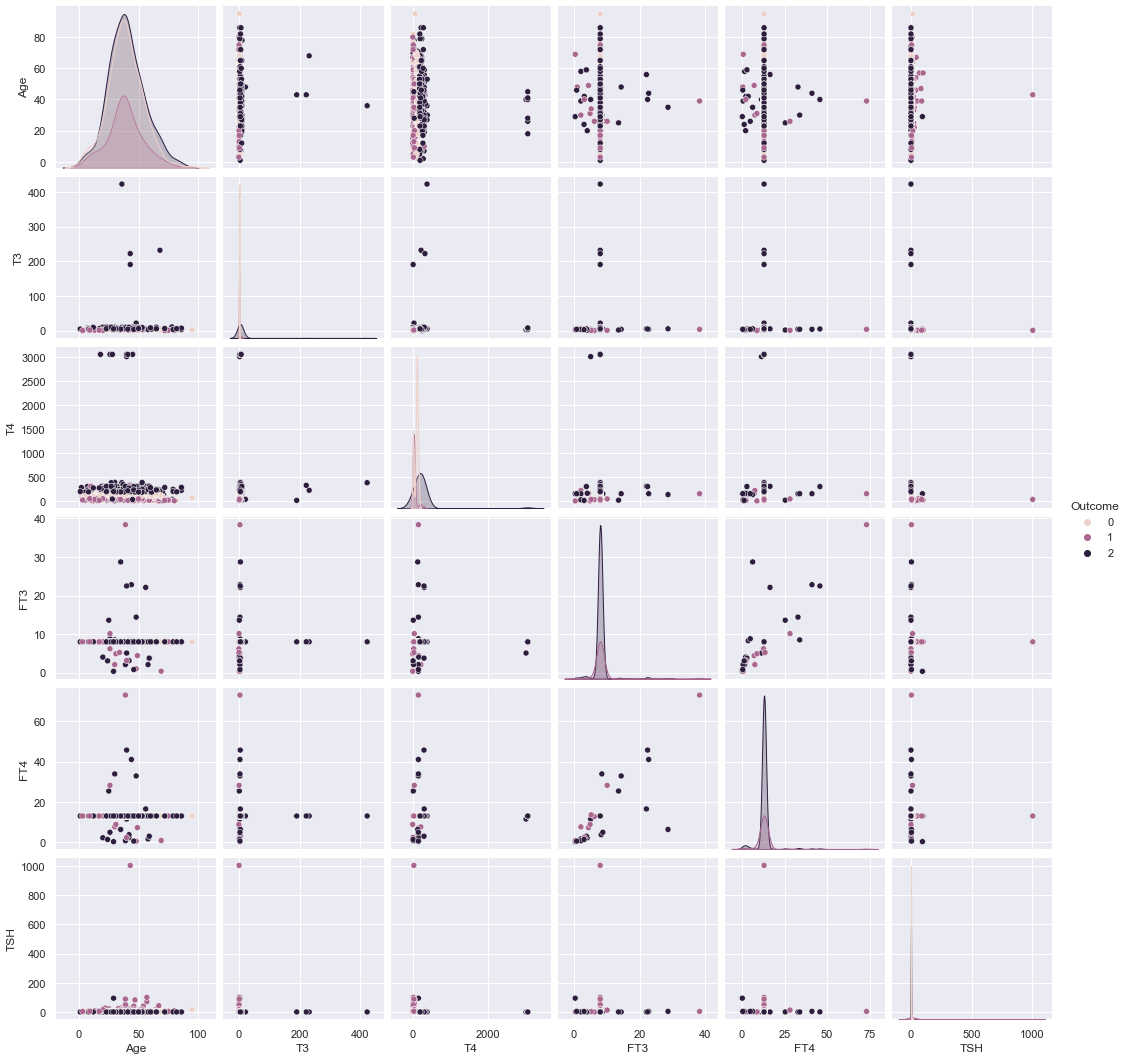

In [65]:
# sns.pairplot is a pretty way to create scatterplots between all variables
data=Data
sns.pairplot(data=data, hue= 'Outcome')
plt.show()

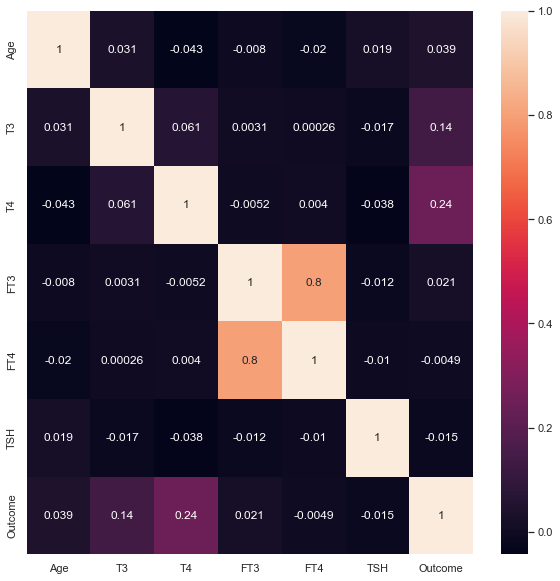

In [66]:
#Correlation Analysis

# To quantify the degree of relationship betwwen two variables.
# we shall correlate features variables with the target varaible(class label) to know how much dependencyis thee
#between prticular features variable and the target.

#import seaborn as sns
corr_data = data.corr()
top_corr_features = corr_data.index
plt.figure(figsize=(10,10))
#plot
g = sns.heatmap(data[top_corr_features].corr(), annot=True)

In [67]:
# See that the diagonal have perfect corr and red 0.54 are highly correlated features etc.
#check how many dataset outcome(class) is 1 or 0

data['Outcome'].value_counts()

2    308
0    279
1    127
Name: Outcome, dtype: int64

In [68]:
X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']

print('Diagnosis features')
print(X)

Diagnosis features
     Age Gender     T3       T4    FT3    FT4     TSH
0     53      F   0.93     6.60   8.00  13.00  0.8900
1     49      F   3.50   160.90   4.42   7.19  0.1000
2     48      F   4.00   151.00  14.40  32.90  0.0046
3     40      F   3.00  3004.00   5.09  11.49  0.0075
4     43      F   3.20     1.57   8.00  13.00  0.4600
..   ...    ...    ...      ...    ...    ...     ...
711   23      F   5.34   193.36   8.00  13.00  0.0100
712   27      F  10.00   305.00   8.00  13.00  0.0560
713   46      F   3.66   230.34   8.00  13.00  0.0200
714   50      F   6.07   186.17   8.00  13.00  0.0200
715   29      M   5.23   196.39   8.00  13.00  0.2000

[714 rows x 7 columns]


In [69]:
print('Outcome or result')
print (Y)

Outcome or result
0      2
1      1
2      2
3      2
4      1
      ..
711    2
712    2
713    2
714    2
715    2
Name: Outcome, Length: 714, dtype: int64


In [70]:
# Data Features scaling
# Splitting the X and Y into the


In [71]:
x = data.drop(columns = 'Gender', axis=1)

In [72]:
# Training set and Testing set
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 0)

#print X features split number
print('X_features, x_train, x_test')
print(x.shape, X_train.shape, X_test.shape)

#print Y outcoome split number
print('Y: Outcome, y_train  y_test Split')
print(Y.shape, y_train.shape, y_test.shape)


X_features, x_train, x_test
(714, 7) (571, 7) (143, 7)
Y: Outcome, y_train  y_test Split
(714,) (571,) (143,)


In [73]:
#standardized_data = scaler.transform(x) #to get the data in the same range
#print(standardized_data) # see the range are almost closely similar

# performing preprocessing part
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [74]:
# Apply PCA to the standardized data

In [75]:
#Applying PCA function
#Applying the PCA function into the training and testing set for analysis

In [76]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

In [77]:
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Machine Learning Algorithms

In [78]:
# Multiclass svm
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly_pred = poly.predict(X_test)

In [79]:
print('accuracy score of multiclass train svm:')
poly.score(X_train, y_train)

accuracy score of multiclass train svm:


0.840630472854641

In [80]:
print('accuracy score of multiclass test svm:')
test_data__svm_accuracy = accuracy_score(poly_pred, y_test)
print('Accurracy score of SVM test data:', test_data__svm_accuracy)


accuracy score of multiclass test svm:
Accurracy score of SVM test data: 0.7832167832167832


In [81]:
# Confusion matrix for poly kernel
from sklearn.metrics import confusion_matrix, accuracy_score
con_matrx = confusion_matrix(y_test,poly_pred)
print(con_matrx)
accuracy_score(y_test, poly_pred)

[[56  0  0]
 [ 0  0 31]
 [ 0  0 56]]


0.7832167832167832

In [82]:
# One vs One multiclass and Gaussian kernel

from sklearn import svm  # import SVC model
classifier = svm.SVC(kernel = 'rbf', probability=True, gamma =1, C=1, decision_function_shape='ovo',random_state = 0) 

svm_ovo_classifer= classifier.fit(X_train, y_train) 


In [83]:
# predicting the test set 
y_predict = svm_ovo_classifer.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
con_matrx = confusion_matrix(y_test, y_predict)
print('\nConfusion Matrix (SVM)')
print(con_matrx)
print('Accuracy score:',accuracy_score(y_test, y_predict)) 
classification_report_svm = classification_report(y_test, y_predict)
print("\n\nSummary of SVM Classification Scores: \n\n {}".format(classification_report_svm))


Confusion Matrix (SVM)
[[56  0  0]
 [ 0 29  2]
 [ 0  0 56]]
Accuracy score: 0.986013986013986


Summary of SVM Classification Scores: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      0.94      0.97        31
           2       0.97      1.00      0.98        56

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



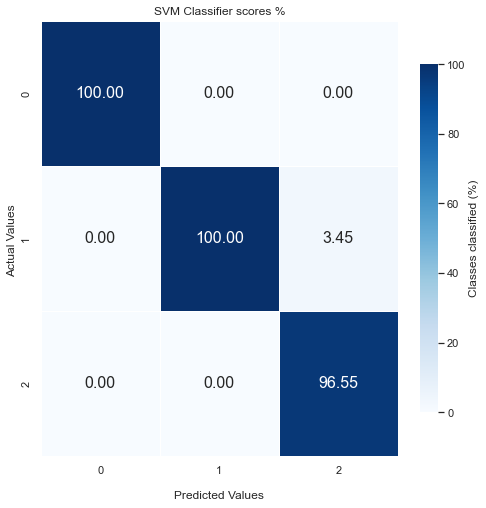

In [84]:
# Figure plotting
cmap = sns.color_palette("Blues", as_cmap=True) # color map
fig, ax = plt.subplots(figsize=(8, 8))
cm_percent = ((con_matrx/con_matrx.sum(axis=0))*100)
cm_percent = np.nan_to_num(cm_percent, copy=True, nan=0.0, posinf=None, neginf=None)
sns.heatmap(cm_percent, cmap = cmap, annot=True, fmt=".2f", linewidth=1, cbar_kws={"label": "Classes classified (%)", "shrink": .8}, annot_kws={"size": 16}) #selecting for percentage only column 
ax.set_title('SVM Classifier scores %')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()
# Figure export
fig.savefig("Confusion_matrx_svm.png", dpi=300, bbox_inches='tight') 

In [85]:
# Prediction
#y_scor = RFC.predict(X_test_pf)

y_pred=svm_ovo_classifer.predict_proba(X_test)
#y_score = model.predict_proba(X_test)
from sklearn.preprocessing import label_binarize
y_tst_bn = label_binarize(y_test, classes=[0, 1, 2])
n_class = y_tst_bn.shape[1]


AUC for Class 0: 1.0
AUC for Class 1: 0.9974078341013826
AUC for Class 2: 0.9991789819376027


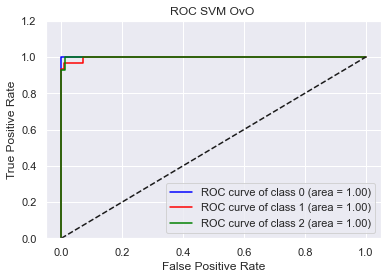

In [87]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
plt.figure()
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_class):
    fpr[i], tpr[i], _ = roc_curve(y_tst_bn[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('AUC for Class {}: {}'.format(i+0, auc(fpr[i], tpr[i])))
colors = cycle(['blue', 'red', 'green'])
n_classes = 3
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.20])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC SVM OvO ')
plt.legend(loc="lower right")
plt.show()


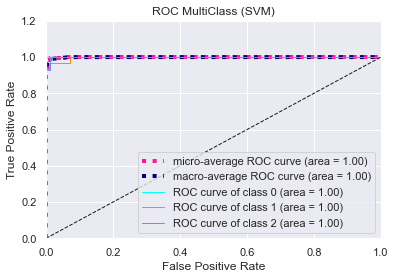

In [88]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_tst_bn.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_class

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_class), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC MultiClass (SVM)")
plt.legend(loc="lower right")
plt.show()

In [89]:
#svc_disp = RocCurveDisplay.from_estimator(svm_ovo_classifer, X_test, y_test)
#plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


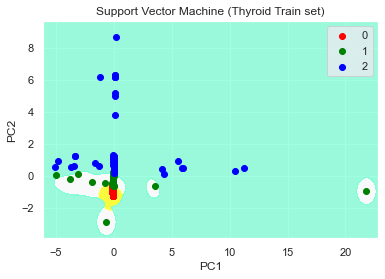

In [90]:
# SVM Prediction of the training set
# result through scatter plot
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2,svm_ovo_classifer.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
plt.title('Support Vector Machine (Thyroid Train set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
 
# show scatter plot
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


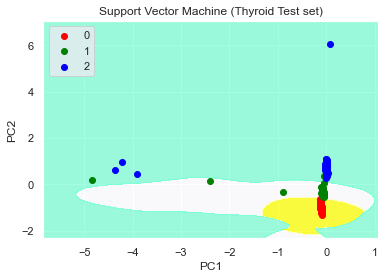

In [91]:
# Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
 
X_set, y_set = X_test, y_test
 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))
 
plt.contourf(X1, X2, svm_ovo_classifer.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
 
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
 
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
 
# title for scatter plot
plt.title('Support Vector Machine (Thyroid Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()
 
# show scatter plot
plt.show()


In [92]:
# Random Forest

In [93]:
# demonstrate the types of features created
from sklearn.ensemble import RandomForestClassifier
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures
Pf = PolynomialFeatures(degree=3)
X_train_pf = Pf.fit_transform(X_train)
X_test_pf = Pf.fit_transform(X_test)


In [94]:
 rfc = RandomForestClassifier(n_estimators = 100)

In [95]:
# train
RFC = rfc.fit(X_train_pf,y_train)

In [96]:
# Prediction
y_scor = RFC.predict(X_test_pf)

ypred=RFC.predict_proba(X_test_pf)
#y_score = model.predict_proba(X_test)
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]


AUC for Class 0: 1.0
AUC for Class 1: 1.0
AUC for Class 2: 1.0


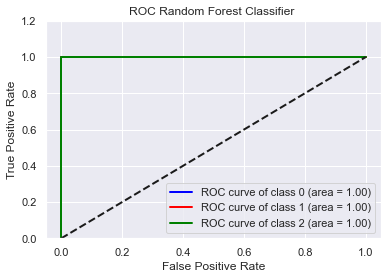

In [97]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
plt.figure()
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], ypred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('AUC for Class {}: {}'.format(i+0, auc(fpr[i], tpr[i])))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([0.0, 1.20])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Random Forest Classifier ')
plt.legend(loc="lower right")
plt.show()





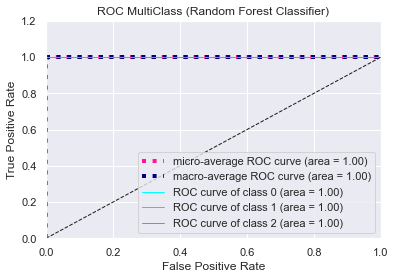

In [98]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), ypred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.20])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC MultiClass (Random Forest Classifier)")
plt.legend(loc="lower right")
plt.show()

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
con_matr = confusion_matrix(y_test, y_scor)
print('\nConfusion Matrix (Random Forest)')
print(con_matr)
print('Accuracy score:',accuracy_score(y_test, y_scor) )
classification_report = classification_report(y_test, y_scor)
print("\n\nSummary of Random Forest Classification Scores: \n\n {}".format(classification_report))
#fig.savefig("Random_Forest_accuracy_scores.png", dpi=300, bbox_inches='tight') 


Confusion Matrix (Random Forest)
[[56  0  0]
 [ 0 30  1]
 [ 0  0 56]]
Accuracy score: 0.993006993006993


Summary of Random Forest Classification Scores: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      0.97      0.98        31
           2       0.98      1.00      0.99        56

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



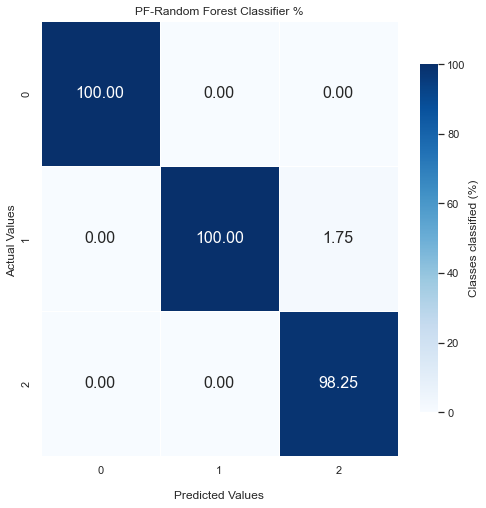

In [100]:
# Figure plotting
cmap = sns.color_palette("Blues", as_cmap=True) # color map
fig, ax = plt.subplots(figsize=(8, 8))
cm_percent = ((con_matr/con_matr.sum(axis=0))*100)
cm_percent = np.nan_to_num(cm_percent, copy=True, nan=0.0, posinf=None, neginf=None)
sns.heatmap(cm_percent, cmap = cmap, annot=True, fmt=".2f", linewidth=1, cbar_kws={"label": "Classes classified (%)", "shrink": .8}, annot_kws={"size": 16}) #selecting for percentage only column 
ax.set_title('PF-Random Forest Classifier %')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
#cmap='Blues'
plt.show()
# Figure export
fig.savefig("Confusion_matrix.png", dpi=300, bbox_inches='tight') 